In [1]:
import yaml
import requests, json
import pprint
#import urllib3
#urllib3.disable_warnings()

import numpy as np
import pandas as pd
import yorkpy.analytics as yka

import json
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import glob
import os

In [2]:
from espncricinfo.summary import Summary
from espncricinfo.match import Match 
from espncricinfo.series import Series
from espncricinfo.player import Player

from bs4 import BeautifulSoup
from espncricinfo.exceptions import MatchNotFoundError, NoScorecardError

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\grequests.py:21: MonkeyPatchWarning: Monkey-patching ssl after ssl has already been imported may lead to errors, including RecursionError on Python 3.6. It may also silently lead to incorrect behaviour on Python 3.7. Please monkey-patch earlier. See https://github.com/gevent/gevent/issues/1016. Modules that had direct imports (NOT patched): ['urllib3.contrib.pyopenssl (C:\\Users\\rbat\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\urllib3\\contrib\\pyopenssl.py)', 'urllib3.util (C:\\Users\\rbat\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\urllib3\\util\\__init__.py)']. 
  curious_george.patch_all(thread=False, select=False)
C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


The source for these id's is ESPN Cricinfo website

In [3]:
venue_city = pd.read_excel('Venue_city_mapping.xlsx')

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [4]:
testlist = ['1109605','1109606','1109607','1109608','1109609','1119496','1119497','1119498','1119499','1119500','1120090',
'1120091','1120092','1122726','1122727','1122728','1122279','1122280','1122281','1122282','1122283','1122284','1119546',
'1119547','1119548','1153246','1153247','1153249','1153251','1153253','1153255','1157754','1157755','1157756','1157757',
'1157758','1144997','1144998','1144999','1153691','1153692','1153693','1153694','1153695','1072310','1072311','1072312',
'1072313','1072314','1119537','1119538','1119539','1119540','1119541','1144986','1144987','1144988']

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [5]:
def flatten(js):
    return pd.DataFrame(js).set_index(['text','name']).squeeze()

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [6]:
def getbattingdatafame(list1):
    df = pd.DataFrame()
    for x in list1:
        x1 = Match(x).html
        x2 = json.loads(x1.find_all('script')[12].get_text().replace("\n", " ").replace('window.__INITIAL_STATE__ =','').replace('&dagger;','wk').replace('&amp;','').replace('wkts;','wkts,').replace('wkt;','wkt,').strip().replace('};', "}};").split('};')[0])
        df1bat = pd.DataFrame(x2['gamePackage']['scorecard']['innings']['1']['batsmen'])
        d1title = x2['gamePackage']['scorecard']['innings']['1']['title']
        df1bat['Team'] = d1title.split(' ')[0]
        df2bat = pd.DataFrame(x2['gamePackage']['scorecard']['innings']['2']['batsmen'])
        d2title = x2['gamePackage']['scorecard']['innings']['2']['title']
        df2bat['Team'] = d2title.split(' ')[0]
        df1bat['Oppositionteam'] = d2title.split(' ')[0]
        df2bat['Oppositionteam'] = d1title.split(' ')[0]
        
        Finaldf_bat = pd.concat([df1bat.drop(['captain','commentary','runningScore','runningOver','stats','hasVideoId','href','isNotOut','roles','shortText','trackingName'], axis=1),
#           df1.runningScore.apply(pd.Series),
           df1bat.stats.apply(flatten)], axis=1).append(pd.concat([df2bat.drop(['captain','commentary','runningScore','runningOver','stats','hasVideoId','href','isNotOut','roles','shortText','trackingName'], axis=1),
#                                                               df2.runningScore.apply(pd.Series),
                                                               df2bat.stats.apply(flatten)], axis=1), sort=False)
        Finaldf_bat['city'] = Match(x).town_name
        Finaldf_bat['date'] = Match(x).date
        Finaldf_bat['winner'] = Match(x).match_winner
        df=pd.concat([df,Finaldf_bat])
    return(df)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [7]:
battingdata = getbattingdatafame(testlist)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [8]:
battingdata

,name,Team,Oppositionteam,"(R, runs)","(B, ballsFaced)","(M, minutes)","(4s, fours)","(6s, sixes)","(SR, strikeRate)",city,date,winner,video,videoId
0,N Dickwella,Sri,India,64,74,-,8,0,86.48,Dambulla,2017-08-20,INDIA,NaN,NaN
1,MD Gunathilaka,Sri,India,35,44,-,4,0,79.54,Dambulla,2017-08-20,INDIA,NaN,NaN
2,BKG Mendis,Sri,India,36,37,-,5,0,97.29,Dambulla,2017-08-20,INDIA,NaN,NaN
3,WU Tharanga,Sri,India,13,23,-,0,0,56.52,Dambulla,2017-08-20,INDIA,NaN,NaN
4,AD Mathews,Sri,India,36,50,-,1,1,72.00,Dambulla,2017-08-20,INDIA,NaN,NaN
5,CK Kapugedera,Sri,India,1,2,-,0,0,50.00,Dambulla,2017-08-20,INDIA,NaN,NaN
6,PWH de Silva,Sri,India,2,5,-,0,0,40.00,Dambulla,2017-08-20,INDIA,NaN,NaN
7,NLTC Perera,Sri,India,0,5,-,0,0,0.00,Dambulla,2017-08-20,INDIA,NaN,NaN
8,PADLR Sandakan,Sri,India,5,8,-,0,0,62.50,Dambulla,2017-08-20,INDIA,NaN,NaN
9,SL Malinga,Sri,India,8,6,-,0,1,133.33,Dambulla,2017-08-20,INDIA,NaN,NaN


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [9]:
def getbowlingdatafame(list1):
    df = pd.DataFrame()
    for x in list1:
        x1 = Match(x).html
        x2 = json.loads(x1.find_all('script')[12].get_text().replace("\n", " ").replace('window.__INITIAL_STATE__ =','').replace('&dagger;','wk').replace('&amp;','').replace('wkts;','wkts,').replace('wkt;','wkt,').strip().replace('};', "}};").split('};')[0])
        df1bowl = pd.DataFrame(x2['gamePackage']['scorecard']['innings']['1']['bowlers'])
        d1title = x2['gamePackage']['scorecard']['innings']['1']['title']
        df2bowl = pd.DataFrame(x2['gamePackage']['scorecard']['innings']['2']['bowlers'])
        d2title = x2['gamePackage']['scorecard']['innings']['2']['title']
        df1bowl['Team'] = d2title.split(' ')[0]
        df2bowl['Team'] = d1title.split(' ')[0]
        df1bowl['Oppositionteam'] = d1title.split(' ')[0]
        df2bowl['Oppositionteam'] = d2title.split(' ')[0]
        
        Finaldf_bowl = pd.concat([df1bowl.drop(['captain','stats','hasVideoId','href','roles','trackingName'], axis=1),
                       df1bowl.stats.apply(flatten)], axis=1).append(pd.concat([df2bowl.drop(['captain','stats','hasVideoId','href','roles','trackingName'], axis=1),
                                                               df2bowl.stats.apply(flatten)], axis=1))
        Finaldf_bowl['city'] = Match(x).town_name
        Finaldf_bowl['date'] = Match(x).date
        df=pd.concat([df,Finaldf_bowl])
    return(df)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [10]:
getbowlingdatafame(testlist)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,name,Team,Oppositionteam,"(O, overs)","(M, maidens)","(R, conceded)","(W, wickets)","(Econ, economyRate)","(0s, dots)","(4s, foursConceded)","(6s, sixesConceded)","(WD, wides)","(NB, noballs)",city,date,video,videoId
0,B Kumar,India,Sri,6,0,33,0,5.50,19,4,0,3,0,Dambulla,2017-08-20,NaN,NaN
1,HH Pandya,India,Sri,6,0,35,0,5.83,18,4,0,3,0,Dambulla,2017-08-20,NaN,NaN
2,JJ Bumrah,India,Sri,6.2,0,22,2,3.47,25,1,0,2,0,Dambulla,2017-08-20,NaN,NaN
3,YS Chahal,India,Sri,10,0,60,2,6.00,27,5,1,1,0,Dambulla,2017-08-20,NaN,NaN
4,KM Jadhav,India,Sri,5,0,26,2,5.20,15,3,0,1,0,Dambulla,2017-08-20,NaN,NaN
5,AR Patel,India,Sri,10,0,34,3,3.40,35,1,1,0,0,Dambulla,2017-08-20,NaN,NaN
0,SL Malinga,Sri,India,8,0,52,0,6.50,21,5,1,1,0,Dambulla,2017-08-20,NaN,NaN
1,MVT Fernando,Sri,India,6,0,43,0,7.16,19,7,0,1,0,Dambulla,2017-08-20,NaN,NaN
2,AD Mathews,Sri,India,2,0,9,0,4.50,6,1,0,0,0,Dambulla,2017-08-20,NaN,NaN
3,NLTC Perera,Sri,India,2,0,18,0,9.00,6,4,0,0,0,Dambulla,2017-08-20,NaN,NaN


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [11]:
Player('28081').last_odi

{'url': 'http://www.espncricinfo.com/ci/engine/match/1153695.html',
 'match_id': 1153695,
 'title': 'New Zealand v India at Wellington, Feb 3, 2019'}

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [12]:
Match('1109605').home_team 
#Match('1109605').team_2_innings
Match('1109605').latest_batting

[{'balls_faced': '13',
  'hand': 'right',
  'image_path': '/db/PICTURES/CMS/222900/222915.jpg',
  'known_as': 'Rohit Sharma',
  'notout': '0',
  'player_id': '48405',
  'popular_name': 'Rohit',
  'position': '1',
  'position_group': 'top',
  'runs': '4'},
 {'balls_faced': '90',
  'hand': 'left',
  'image_path': '/db/PICTURES/CMS/263700/263700.20.jpg',
  'known_as': 'Shikhar Dhawan',
  'live_current_name': 'striker',
  'notout': '1',
  'player_id': '15887',
  'popular_name': 'S Dhawan',
  'position': '2',
  'position_group': 'top',
  'runs': '132'},
 {'balls_faced': '70',
  'hand': 'right',
  'image_path': '/db/PICTURES/CMS/282600/282626.jpg',
  'known_as': 'Virat Kohli',
  'live_current_name': 'non-striker',
  'notout': '1',
  'player_id': '49752',
  'popular_name': 'Kohli',
  'position': '3',
  'position_group': 'top',
  'runs': '82'}]

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [13]:
df = pd.DataFrame(columns=['winner'])
df['winner'] = Match('1109605').match_winner

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [14]:
def getmatchesdatafame(list1):
    df = pd.DataFrame(columns=['Date', 'Team 1', 'Team 2', 'Home team', 'City', 'winner'])
    for x in list1:
        x1 = Match(x).html
        x2 = json.loads(x1.find_all('script')[12].get_text().replace("\n", " ").replace('window.__INITIAL_STATE__ =','').replace('&dagger;','wk').replace('&amp;','').replace('wkts;','wkts,').replace('wkt;','wkt,').strip().replace('};', "}};").split('};')[0])
        d1title = x2['gamePackage']['scorecard']['innings']['1']['title']
        d2title = x2['gamePackage']['scorecard']['innings']['2']['title']
        df = df.append(pd.Series([Match(x).date, d1title.split(' ')[0], d2title.split(' ')[0], Match(x).home_team, Match(x).town_name, Match(x).match_winner], index=df.columns ), ignore_index=True)
    return(df)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [15]:
getmatchesdatafame(testlist)

,Date,Team 1,Team 2,Home team,City,winner
0,2017-08-20,Sri,India,SL,Dambulla,INDIA
1,2017-08-24,Sri,India,SL,Kandy,INDIA
2,2017-08-27,Sri,India,SL,Kandy,INDIA
3,2017-08-31,India,Sri,SL,Colombo,INDIA
4,2017-09-03,Sri,India,SL,Colombo,INDIA
5,2017-09-17,India,Australia,INDIA,Chennai,INDIA
6,2017-09-21,India,Australia,INDIA,Kolkata,INDIA
7,2017-09-24,Australia,India,INDIA,Indore,INDIA
8,2017-09-28,Australia,India,INDIA,Bengaluru,AUS
9,2017-10-01,Australia,India,INDIA,Nagpur,INDIA


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [16]:
def getAllMatchesBetweenTeams(team1,team2,dir=".",save=False):
    
    # Create the 2 combinations
    t1 = team1 +'-' + team2 + '*.csv'
    t2 = team2 + '-' + team1 + '*.csv'
    path1= os.path.join(dir1,t1)
    path2 = os.path.join(dir1,t2)
    
    files = glob.glob(path1) + glob.glob(path2)
    print(len(files))
    # Save as CSV only if there are matches between the 2 teams
    if len(files) !=0:
        df = pd.DataFrame()
        for file in files:
            df1 = pd.read_csv(file)
            df=pd.concat([df,df1])    
        if save==True:
            dest= team1 +'-' + team2 + '-allMatches.csv'    
            df.to_csv(dest)
        else:
           return(df) 

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [17]:
dir1 = 'C:/Users/rbat\Documents/Data Analytics/Hakhathon UpGrad/data_odis_male'
data_ind_aus = getAllMatchesBetweenTeams("India", "Australia", dir="./data_odis_male/",save=False)

43


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [18]:
def getAllMatchesAllOpposition(team1,dir=".",save=False):
 
    # Create the 2 combinations
    t1 = '*' +  team1 +'*.csv'
    path= os.path.join(dir1,t1)

    
    files = glob.glob(path) 
    print(len(files))
    # Save as CSV only if there are matches between the 2 teams
    if len(files) !=0:
        df = pd.DataFrame()
        for file in files:
            df1 = pd.read_csv(file)
            df=pd.concat([df,df1])    
        if save==True:
            dest= team1 + '-allMatchesAllOpposition.csv'    
            df.to_csv(dest)
        else:
           return(df)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [19]:
dir1 = 'C:/Users/rbat\Documents/Data Analytics/Hakhathon UpGrad/data_odis_male'
data_ind_all = getAllMatchesAllOpposition("India", dir="./data_odis_male/",save=False)

307


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [20]:
dir1 = 'C:/Users/rbat\Documents/Data Analytics/Hakhathon UpGrad/data_odis_male'
data_aus_all = getAllMatchesAllOpposition("Australia", dir="./data_odis_male/",save=False)

291


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [21]:
data_aus_all.head()

,delivery,batsman,bowler,extras_dict,non_striker,runs_dict,wicket_dict,wides,noballs,legbyes,...,resultHow,resultTeam,non_boundary,ManOfMatch,overs,team1,team2,tossWinner,tossDecision,venue
0,0.1,MS Wade,Shapoor Zadran,0,DA Warner,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,MA Starc,50,Afghanistan,Australia,Australia,bat,Sharjah Cricket Association Stadium
1,0.2,MS Wade,Shapoor Zadran,0,DA Warner,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,MA Starc,50,Afghanistan,Australia,Australia,bat,Sharjah Cricket Association Stadium
2,0.3,MS Wade,Shapoor Zadran,0,DA Warner,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,MA Starc,50,Afghanistan,Australia,Australia,bat,Sharjah Cricket Association Stadium
3,0.4,MS Wade,Shapoor Zadran,0,DA Warner,"{'batsman': 1, 'extras': 0, 'total': 1}",0,0.0,0.0,0.0,...,0,0,0,MA Starc,50,Afghanistan,Australia,Australia,bat,Sharjah Cricket Association Stadium
4,0.5,DA Warner,Shapoor Zadran,0,MS Wade,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,MA Starc,50,Afghanistan,Australia,Australia,bat,Sharjah Cricket Association Stadium


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [22]:
data_ind_all.head()

,delivery,batsman,bowler,extras_dict,non_striker,runs_dict,wicket_dict,wides,noballs,legbyes,...,resultHow,resultTeam,non_boundary,ManOfMatch,overs,team1,team2,tossWinner,tossDecision,venue
0,0.1,Noor Ali Zadran,B Kumar,0,Nawroz Mangal,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,RA Jadeja,50,Afghanistan,India,India,field,Shere Bangla National Stadium
1,0.2,Noor Ali Zadran,B Kumar,0,Nawroz Mangal,"{'batsman': 1, 'extras': 0, 'total': 1}",0,0.0,0.0,0.0,...,0,0,0,RA Jadeja,50,Afghanistan,India,India,field,Shere Bangla National Stadium
2,0.3,Nawroz Mangal,B Kumar,0,Noor Ali Zadran,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,RA Jadeja,50,Afghanistan,India,India,field,Shere Bangla National Stadium
3,0.4,Nawroz Mangal,B Kumar,0,Noor Ali Zadran,"{'batsman': 0, 'extras': 0, 'total': 0}",0,0.0,0.0,0.0,...,0,0,0,RA Jadeja,50,Afghanistan,India,India,field,Shere Bangla National Stadium
4,0.5,Nawroz Mangal,B Kumar,{'wides': 1},Noor Ali Zadran,"{'batsman': 0, 'extras': 1, 'total': 1}",0,1.0,0.0,0.0,...,0,0,0,RA Jadeja,50,Afghanistan,India,India,field,Shere Bangla National Stadium


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [23]:
Merge_data = pd.concat([data_aus_all, data_ind_all, data_ind_aus], sort=True).drop_duplicates()

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [24]:
Merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298485 entries, 0 to 395
Data columns (total 38 columns):
ManOfMatch       298485 non-null object
batsman          298485 non-null object
bowler           298485 non-null object
byes             298485 non-null float64
city             298485 non-null object
date             298485 non-null object
delivery         298485 non-null float64
extras           298485 non-null float64
extras_dict      298485 non-null object
fielders         298485 non-null object
gender           298485 non-null object
kind             298485 non-null object
legbyes          298485 non-null float64
match_type       298485 non-null object
neutral_venue    298485 non-null int64
noballs          298485 non-null float64
non_boundary     298485 non-null int64
non_striker      298485 non-null object
overs            298485 non-null int64
penalty          298485 non-null float64
player_out       298485 non-null object
result           298485 non-null int64
resultHow 

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [25]:
Merge_data =pd.merge(Merge_data,venue_city, on='venue',how='left')         # Inner join is used
Merge_data

,ManOfMatch,batsman,bowler,byes,city_x,date,delivery,extras,extras_dict,fielders,...,tossDecision,tossWinner,total,venue,wicket_dict,wides,winMargin,winType,winner,city_y
0,MA Starc,MS Wade,Shapoor Zadran,0.0,0,2012-08-25,0.1,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
1,MA Starc,MS Wade,Shapoor Zadran,0.0,0,2012-08-25,0.2,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
2,MA Starc,MS Wade,Shapoor Zadran,0.0,0,2012-08-25,0.3,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
3,MA Starc,MS Wade,Shapoor Zadran,0.0,0,2012-08-25,0.4,0.0,0,0,...,bat,Australia,1.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
4,MA Starc,DA Warner,Shapoor Zadran,0.0,0,2012-08-25,0.5,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
5,MA Starc,DA Warner,Shapoor Zadran,0.0,0,2012-08-25,0.6,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
6,MA Starc,MS Wade,Dawlat Zadran,0.0,0,2012-08-25,1.1,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
7,MA Starc,MS Wade,Dawlat Zadran,0.0,0,2012-08-25,1.2,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
8,MA Starc,MS Wade,Dawlat Zadran,0.0,0,2012-08-25,1.3,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah
9,MA Starc,MS Wade,Dawlat Zadran,0.0,0,2012-08-25,1.4,0.0,0,0,...,bat,Australia,0.0,Sharjah Cricket Association Stadium,0,0.0,66,runs,Australia,Sharjah


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [29]:
Merge_data.loc[(Merge_data.city_x == 0), ['city_x']] = Merge_data.city_y

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


Captain of the match

In [132]:
Final_data = Merge_data.loc[:,['date', 'city_x', 'team1', 'team2','winner']].drop_duplicates().sort_values('date', ascending=False)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [27]:
yka.getRuns(data_ind_aus).sort_values('runs', ascending = False)

,batsman,balls,runs
26,RG Sharma,1373,1297.0
5,MS Dhoni,1576,1255.0
38,V Kohli,1046,1002.0
1,SR Tendulkar,1236,920.0
11,RT Ponting,1154,876.0
36,MEK Hussey,839,753.0
10,SR Watson,747,717.0
57,GJ Bailey,654,710.0
51,S Dhawan,638,626.0
14,MJ Clarke,814,609.0


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [28]:
cities_india = ['Mumbai', 'Rajkot', 'Chandigarh']

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [29]:
data_ind_aus_in_india = data_ind_aus[data_ind_aus.city.isin(cities_india)]

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [30]:
data_ind_aus_notin_india = data_ind_aus[~data_ind_aus.city.isin(cities_india)]

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


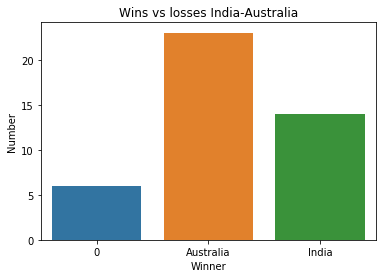

<Figure size 432x288 with 0 Axes>

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [31]:
yka.plotWinLossBetweenTeams(data_ind_aus,"India","Australia") 

In [32]:
data_ind_aus.city.unique()

array(['Chandigarh', 'Bangalore', 'Kochi', 'Hyderabad', 'Vadodara',
       'Nagpur', 'Mumbai', 'Delhi', 'Guwahati', 'Visakhapatnam',
       'Ahmedabad', 'Pune', 'Jaipur', 'Ranchi', 'Kuala Lumpur',
       'Brisbane', 0, 'Centurion', 'Perth', 'Canberra'], dtype=object)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [33]:
data_ind_aus[data_ind_aus.city == 0].venue.unique()

array(['Melbourne Cricket Ground', 'Adelaide Oval',
       'Sydney Cricket Ground'], dtype=object)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [34]:
data_ind_aus[data_ind_aus.city == 0].venue.unique()

array(['Melbourne Cricket Ground', 'Adelaide Oval',
       'Sydney Cricket Ground'], dtype=object)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [35]:
data_ind_all.city.unique()

array(['Mirpur', 'Kuala Lumpur', 'Brisbane', 0, 'Centurion', 'Perth',
       'Canberra', 'Trinidad', 'Karachi', 'Fatullah', 'Birmingham',
       'Southampton', 'Bristol', 'Manchester', 'Leeds', 'London',
       'Chester-le-Street', 'Cardiff', 'Nottingham', 'Chandigarh',
       'Bangalore', 'Kochi', 'Hyderabad', 'Vadodara', 'Nagpur', 'Mumbai',
       'Delhi', 'Guwahati', 'Visakhapatnam', 'Ahmedabad', 'Pune',
       'Jaipur', 'Ranchi', 'Faridabad', 'Margao', 'Jamshedpur', 'Indore',
       'Rajkot', 'Kanpur', 'Cuttack', 'Kolkata', 'Dharamsala', 'Hamilton',
       'Colombo', 'Chennai', 'Dharmasala', 'Abu Dhabi', 'Gwalior',
       'Belfast', 'Hobart', 'Bulawayo', 'Jamaica', 'Johannesburg',
       'Auckland', 'Napier', 'Wellington', 'Christchurch', 'Peshawar',
       'Lahore', 'Glasgow', 'Durban', 'Cape Town', 'Port Elizabeth',
       'Hambantota', 'St Kitts', 'St Lucia', 'Antigua'], dtype=object)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [36]:
cities = ['Visakhapatnam', 'Bengaluru', 'Hyderabad', 'Nagpur', 'Ranchi', 'Mohali', 'Delhi']

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [37]:
data_ind_all['OppTeam'] = np.where(data_ind_all['team']==data_ind_all['team1'], data_ind_all['team2'], data_ind_all['team1'])

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [38]:
def getSixes(df):
    df1=df[['batsman','runs','extras','total','non_boundary','city', 'team', 'OppTeam','date']]
    df2= df1.loc[(df1.runs ==6)]
    sixes= df2[['batsman','city','team','OppTeam','runs','date']].groupby(['batsman','city','team', 'OppTeam','date'],sort=False,as_index=False).count()
    sixes.columns=['batsman','city','team','Oppositionteam', 'date', '6s']
    return(sixes)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [39]:
Sixes_data = getSixes(data_ind_all).sort_values('6s', ascending = False)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [40]:
Sixes_data

,batsman,city,team,Oppositionteam,date,6s
351,RG Sharma,Bangalore,India,Australia,2013-11-02,16
715,AB de Villiers,Mumbai,South Africa,India,2015-10-25,11
910,KA Pollard,Chennai,West Indies,India,2011-12-11,10
854,AD Mathews,Ranchi,Sri Lanka,India,2014-11-16,10
848,RG Sharma,Kolkata,India,Sri Lanka,2014-11-13,9
1082,YK Pathan,Centurion,India,South Africa,2011-01-23,8
519,YK Pathan,Bangalore,India,New Zealand,2010-12-07,7
164,Yuvraj Singh,Trinidad,India,Bermuda,2007-03-19,7
1171,Yuvraj Singh,Jamaica,India,West Indies,2009-06-26,7
354,GJ Maxwell,Bangalore,Australia,India,2013-11-02,7


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [41]:
def getWickets(df):
    df1=df[['bowler','kind', 'player_out','fielders','city', 'team', 'OppTeam','date']]
    df2= df1[df1.player_out !='0']
    df3 = df2[['bowler','player_out','city','team','OppTeam','date']].groupby(['bowler','city','team', 'OppTeam','date'],sort=False,as_index=False).count()
    return(df3)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [42]:
getWickets(data_ind_all).sort_values('player_out', ascending = False)

,bowler,city,team,OppTeam,date,player_out
1887,WPUJC Vaas,Colombo,India,Sri Lanka,2006-08-18,12
1888,SL Malinga,Colombo,India,Sri Lanka,2006-08-18,10
1979,AD Mathews,Colombo,India,Sri Lanka,2009-09-12,6
638,S Sreesanth,Indore,England,India,2006-04-15,6
2255,A Mishra,Bulawayo,Zimbabwe,India,2013-08-03,6
244,STR Binny,Mirpur,Bangladesh,India,2014-06-17,6
24,B Lee,Brisbane,India,Australia,2008-02-03,6
1273,BAW Mendis,Karachi,India,Sri Lanka,2008-07-06,6
104,MA Starc,0,India,Australia,2015-01-18,6
267,Mustafizur Rahman,Mirpur,India,Bangladesh,2015-06-21,6


C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


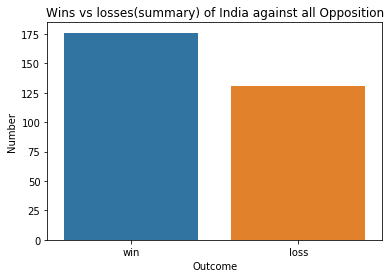

<Figure size 432x288 with 0 Axes>

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [43]:
yka.plotWinLossByTeamAllOpposition(data_ind_all, "India")

In [44]:
data_ind_aus.venue.unique()

array(['Punjab Cricket Association Stadium, Mohali',
       'M Chinnaswamy Stadium', 'Nehru Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Sector 16 Stadium',
       'Reliance Stadium', 'Vidarbha Cricket Association Ground',
       'Wankhede Stadium', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Feroz Shah Kotla',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Sardar Patel Stadium, Motera',
       'Maharashtra Cricket Association Stadium',
       'Sawai Mansingh Stadium', 'JSCA International Stadium Complex',
       'Kinrara Academy Oval', 'Brisbane Cricket Ground, Woolloongabba',
       'Melbourne Cricket Ground', 'Adelaide Oval',
       'Sydney Cricket Ground', 'SuperSport Park',
       'Western Australia Cricket Association Ground', 'Manuka Oval'],
      dtype=object)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [45]:
data_ind_aus.city.unique()

array(['Chandigarh', 'Bangalore', 'Kochi', 'Hyderabad', 'Vadodara',
       'Nagpur', 'Mumbai', 'Delhi', 'Guwahati', 'Visakhapatnam',
       'Ahmedabad', 'Pune', 'Jaipur', 'Ranchi', 'Kuala Lumpur',
       'Brisbane', 0, 'Centurion', 'Perth', 'Canberra'], dtype=object)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [6]:
x1 = Match('1109605').html
x2 = json.loads(x1.find_all('script')[12].get_text().replace("\n", " ").replace('window.__INITIAL_STATE__ =','').replace('&dagger;','wk').replace('&amp;','').replace('wkts;','wkts,').replace('wkt;','wkt,').strip().replace('};', "}};").split('};')[0])
x3 = x2['gamePackage']['scorecard']['innings']
with open('data2.txt', 'w') as outfile:  
    json.dump(x3, outfile)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\gevent\hub.py:154: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:
